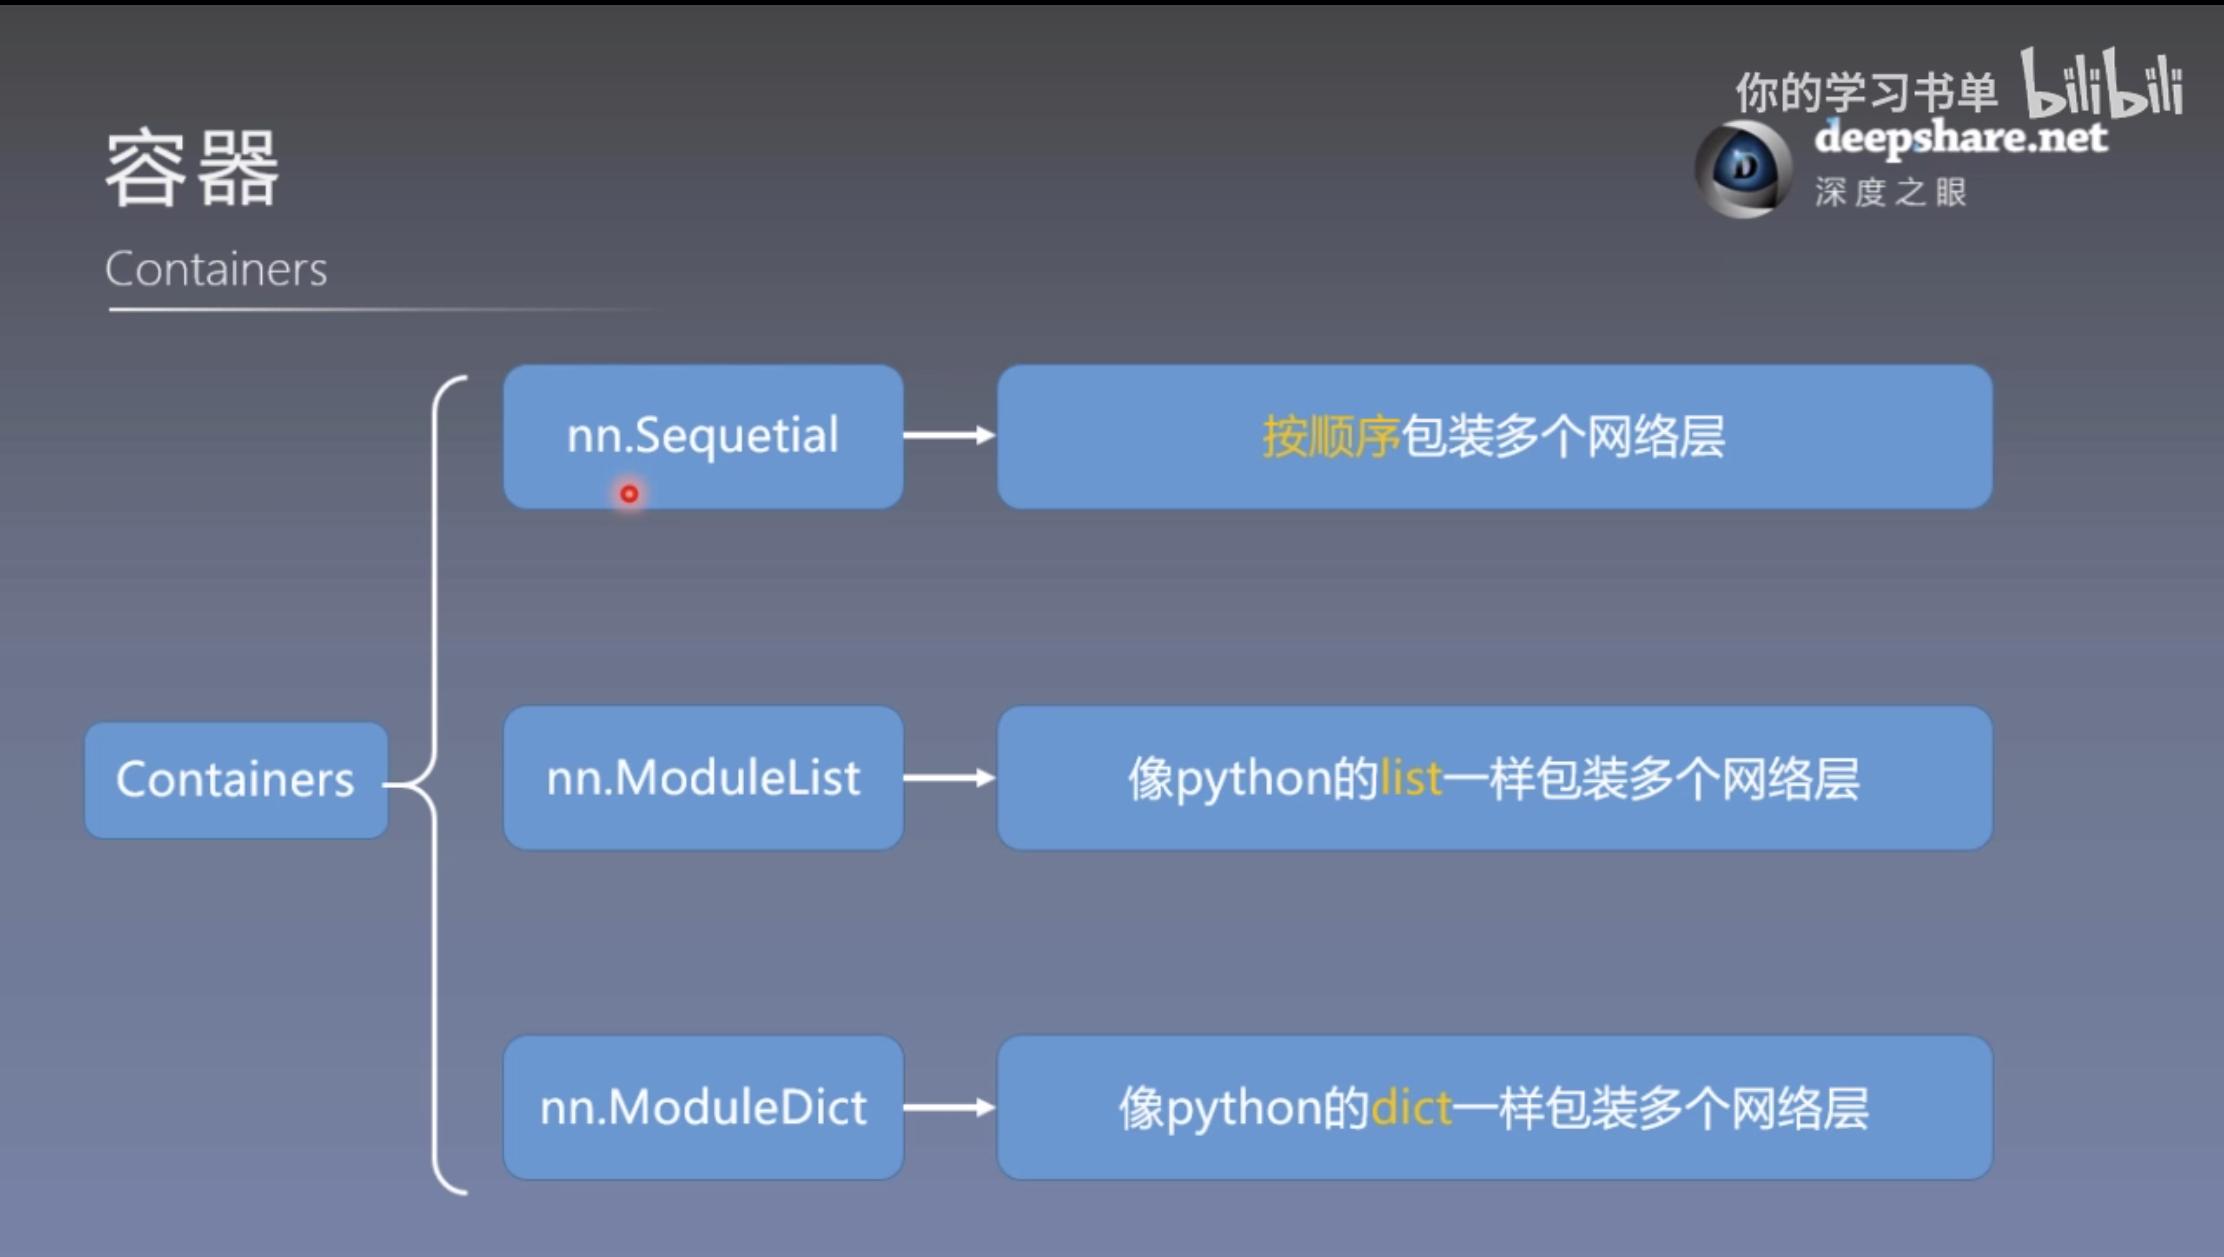

In [5]:
import torch.nn as nn
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [1]:
# sequential

In [12]:
class Sequential(nn.Module):
    def __init__(self, classes):
        super(Sequential, self).__init__()
        self.features =torch.nn.Sequential(
            nn.Conv2d(3, 6, 5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(6, 16, 5),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        ) 
        self.classifier = nn.Sequential(
            nn.Linear(16*5*5, 120),
            nn.ReLU(),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Linear(84, classes),
        )
    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size()[0], -1)
        x = self.classifier(x)
        return x

In [19]:
print(Sequential(4)._modules)

OrderedDict([('features', Sequential(
  (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)), ('classifier', Sequential(
  (0): Linear(in_features=400, out_features=120, bias=True)
  (1): ReLU()
  (2): Linear(in_features=120, out_features=84, bias=True)
  (3): ReLU()
  (4): Linear(in_features=84, out_features=4, bias=True)
))])


In [20]:
class ModuleList(nn.Module):
    def __init__(self):
        super(ModuleList, self).__init__()
        self.linears = nn.ModuleList([nn.Linear(10, 10) for i in range(20)])
    
    def forward(self, x):
        for i, linear in enumerate(self.linears):
            x = linear(x)
        return x
    

In [22]:
print(ModuleList())

ModuleList(
  (linears): ModuleList(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): Linear(in_features=10, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): Linear(in_features=10, out_features=10, bias=True)
    (5): Linear(in_features=10, out_features=10, bias=True)
    (6): Linear(in_features=10, out_features=10, bias=True)
    (7): Linear(in_features=10, out_features=10, bias=True)
    (8): Linear(in_features=10, out_features=10, bias=True)
    (9): Linear(in_features=10, out_features=10, bias=True)
    (10): Linear(in_features=10, out_features=10, bias=True)
    (11): Linear(in_features=10, out_features=10, bias=True)
    (12): Linear(in_features=10, out_features=10, bias=True)
    (13): Linear(in_features=10, out_features=10, bias=True)
    (14): Linear(in_features=10, out_features=10, bias=True)
    (15): Linear(in_features=10, out_features=10, bias=Tru

In [24]:
class ModuleDict(nn.Module):
    def __init__(self):
        super(ModuleDict, self).__init__()
        self.choices = nn.ModuleDict({
            'conv': nn.Conv2d(10, 10, 3),
            'pool': nn.MaxPool2d(3)
        })
        
        self.activations = nn.ModuleDict({
            'relu': nn.ReLU(),
            'prelu': nn.PReLU(),
        })
        
    def forward(self, x, choice, act):
        x = self.choices[choice](x)
        x = self.activation[act](x)
        return x

net = ModuleDict()

In [25]:
print(net)

ModuleDict(
  (choices): ModuleDict(
    (conv): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (pool): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  )
  (activations): ModuleDict(
    (prelu): PReLU(num_parameters=1)
    (relu): ReLU()
  )
)
